# White Elephants Kill. Can we anticipate them?
# Final Project - Andrei Bartra and Angelo Cozzubo

## Contents:
1. Descriptive Analysis: Geographical Variation 
2. Descriptive Analysis: Target Variable
3. Pre Processing 
4. Machine Learning Analysis: Lasso, RF, features importance and fit

In [1]:
import gc
gc.enable()
import sys  
import os 
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt 
import seaborn as sns
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import imageio
#My function py
import my_fns as fn
#Visualize 
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## 1. Descriptive Analysis: Geographical Variation
### Map (gif) for total PIM by region/year 

In [2]:
mapa_uni = pd.read_csv(r'..\data\clean\mapa_uni.csv')
mapa_multi = pd.read_csv(r'..\data\clean\mapa_multi.csv')

In [3]:
mapa_all = mapa_uni.merge(mapa_multi, on=['dpto', 'ANO_EJE'], how = 'left')

In [4]:
mapa_all['pim_tot_mill'] = (mapa_all['pim_proj_x'] + mapa_all['pim_proj_y'])/1000000
mapa_all = mapa_all[['pim_tot_mill', 'dpto', 'ANO_EJE']]

In [5]:
# set the filepath and load in a shapefile
shape_ = r'..\data\raw\ext\dptos\DEPARTAMENTOS.shp'
map_regions = gpd.read_file(shape_)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_regions.head()

,IDDPTO,DEPARTAMEN,CAPITAL,FUENTE,geometry
0,01,AMAZONAS,CHACHAPOYAS,INEI,"POLYGON ((-77.81211 -2.98962, -77.81332 -2.990..."
1,02,ANCASH,HUARAZ,INEI,"POLYGON ((-77.64692 -8.05086, -77.64669 -8.052..."
2,03,APURIMAC,ABANCAY,INEI,"POLYGON ((-73.74632 -13.17456, -73.74570 -13.1..."
3,04,AREQUIPA,AREQUIPA,INEI,"POLYGON ((-71.98109 -14.64062, -71.98093 -14.6..."
4,05,AYACUCHO,AYACUCHO,INEI,"POLYGON ((-74.34843 -12.17503, -74.35000 -12.1..."


In [6]:
#same regional code and merge 
mapa_all['ANO_EJE'] = mapa_all['ANO_EJE'].astype(int)
mapa_all['ID_DPTO'] = mapa_all['dpto'].apply(lambda x: str(x) if x > 9 else "0" + str(x))
merged = map_regions.set_index('IDDPTO').join(mapa_all.set_index('ID_DPTO'))
merged.head()

,DEPARTAMEN,CAPITAL,FUENTE,geometry,pim_tot_mill,dpto,ANO_EJE
01,AMAZONAS,CHACHAPOYAS,INEI,"POLYGON ((-77.81211 -2.98962, -77.81332 -2.990...",18.950712,1,2012
01,AMAZONAS,CHACHAPOYAS,INEI,"POLYGON ((-77.81211 -2.98962, -77.81332 -2.990...",26.107334,1,2013
01,AMAZONAS,CHACHAPOYAS,INEI,"POLYGON ((-77.81211 -2.98962, -77.81332 -2.990...",6.644427,1,2014
01,AMAZONAS,CHACHAPOYAS,INEI,"POLYGON ((-77.81211 -2.98962, -77.81332 -2.990...",8.585953,1,2015
01,AMAZONAS,CHACHAPOYAS,INEI,"POLYGON ((-77.81211 -2.98962, -77.81332 -2.990...",15.373802,1,2016


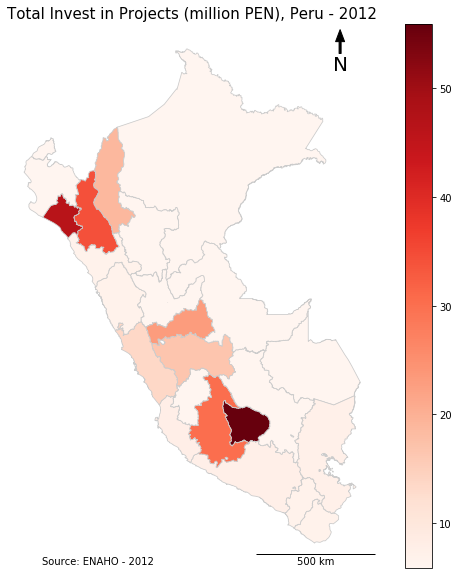

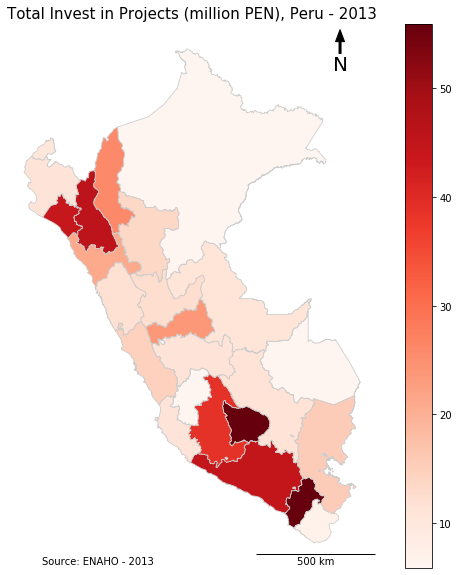

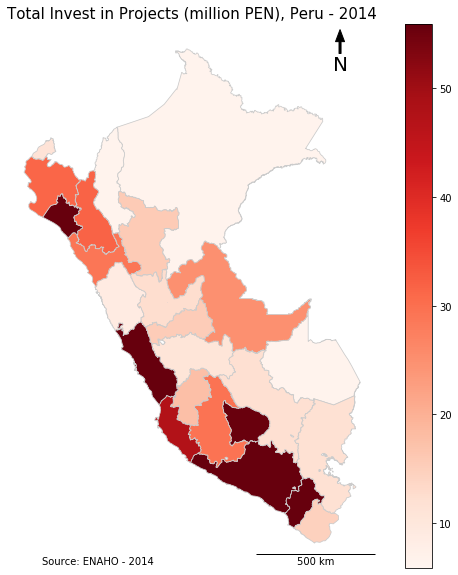

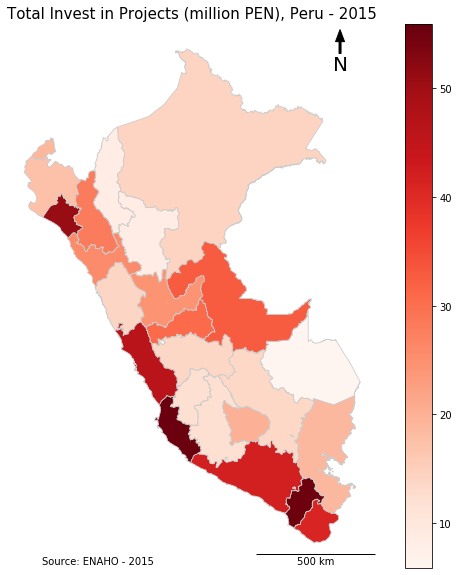

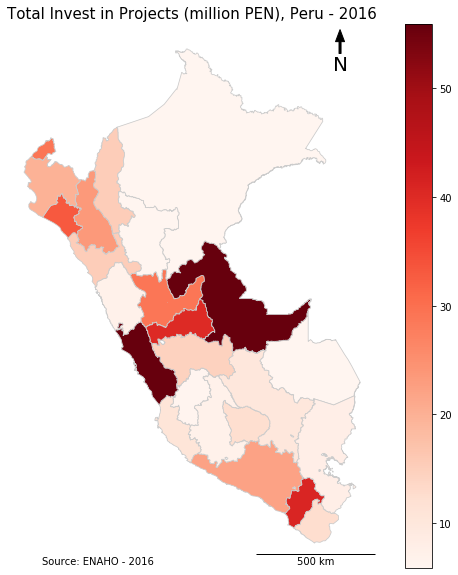

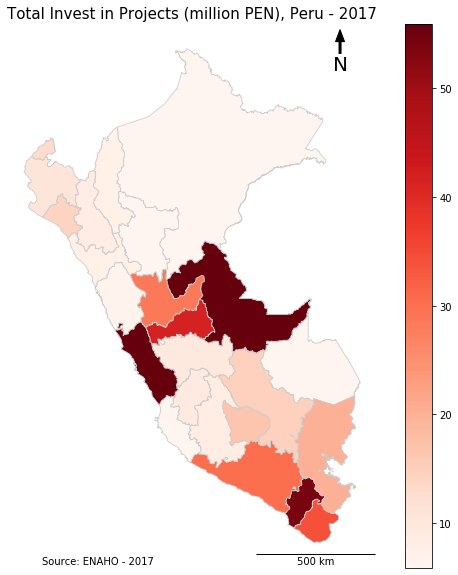

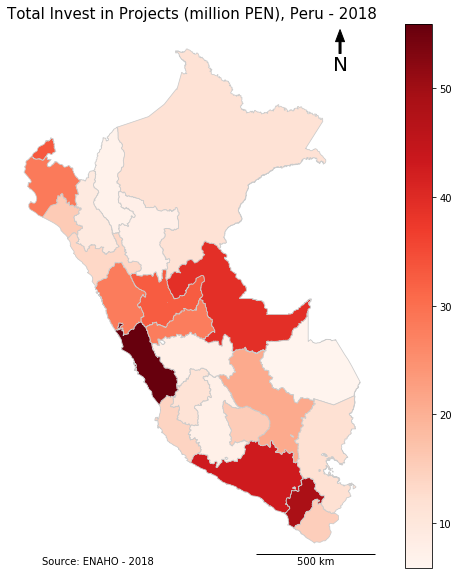

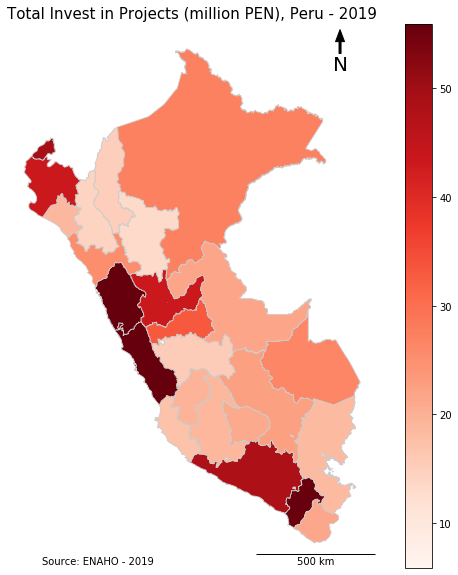

In [7]:
variable = 'pim_tot_mill'
color = 'Reds'
title = 'Amount in Project Investment (millions PEN), Peru - {}'.format('2012-2019')
maps = []

for year in range(2012,2020):
    title = 'Total Invest in Projects (million PEN), Peru - {}'.format(str(year))
    source = "Source: ENAHO - {}".format(str(year))
    vmin, vmax = merged.pim_tot_mill.quantile(0.10), merged.pim_tot_mill.quantile(0.90)
    map_ = fn.share_maps_cb(merged, 'ANO_EJE', year, variable, color, title, source, vmin, vmax, False)
    map_.savefig(r"..\results\maps\total_PIM_{}.png".format(str(year)))
    maps.append(imageio.imread(r"..\results\maps\total_PIM_{}.png".format(str(year))))
    os.remove(r"..\results\maps\total_PIM_{}.png".format(str(year)))

imageio.mimsave(r"..\results\maps\total_PIM_12-19.gif", maps, duration=0.9, subrectangles=True)
del merged

## 2. Descriptive Analysis: Target Variable
### CDF for PIM by electoral years 

In [8]:
full = pd.read_csv(r'..\data\clean\df.csv')
full = full.loc[full.ANO_EJE > 2012]
full = full.loc[full.ANO_EJE < 2019]
print(full.shape)
full.head(1)

(634344, 871)


,CODIGO_UNICO,ANO_EJE,mes,FECHA_REGISTRO,FECHA_VIABLE_APROBADO,SEC_EJEC,dev_acc_proj,exec,dev_acc_ue,exec_ue,pim_proj,dev_proj,elect_year,first_year,elect_presi_year,first_presi_year,nv_1,nv_2,nv_3,st_3,st_5,st_6,st_7,st_10,st_11,st_13,st_16,st_26,st_36,st_37,st_99,st_100,st_101,ft_1,ft_2,ft_3,ft_4,ft_5,pim_st_year_3,pim_st_year_5,pim_st_year_6,pim_st_year_7,pim_st_year_10,pim_st_year_11,pim_st_year_13,pim_st_year_16,pim_st_year_26,pim_st_year_36,pim_st_year_37,pim_st_year_99,pim_st_year_100,pim_st_year_101,pim_st_proj_3,pim_st_proj_5,pim_st_proj_6,pim_st_proj_7,pim_st_proj_10,pim_st_proj_11,pim_st_proj_13,pim_st_proj_16,pim_st_proj_26,pim_st_proj_36,pim_st_proj_37,pim_st_proj_99,pim_st_proj_100,pim_st_proj_101,pim_ft_proj_1,pim_ft_proj_2,pim_ft_proj_3,pim_ft_proj_4,pim_ft_proj_5,pim_nv_proj_1,pim_nv_proj_2,pim_nv_proj_3,pim_st_proj_pr_3,pim_st_proj_pr_5,pim_st_proj_pr_6,pim_st_proj_pr_7,pim_st_proj_pr_10,pim_st_proj_pr_11,pim_st_proj_pr_13,pim_st_proj_pr_16,pim_st_proj_pr_26,pim_st_proj_pr_36,pim_st_proj_pr_37,pim_st_proj_pr_99,pim_st_proj_pr_100,pim_st_proj_pr_101,pim_ft_proj_pr_1,pim_ft_proj_pr_2,pim_ft_proj_pr_3,pim_ft_proj_pr_4,pim_ft_proj_pr_5,pim_nv_proj_pr_1,pim_nv_proj_pr_2,pim_nv_proj_pr_3,dev_acc_st_3,dev_acc_st_5,dev_acc_st_6,dev_acc_st_7,dev_acc_st_10,dev_acc_st_11,dev_acc_st_13,dev_acc_st_16,dev_acc_st_26,dev_acc_st_36,dev_acc_st_37,dev_acc_st_99,dev_acc_st_100,dev_acc_st_101,exec_st_3,exec_st_5,exec_st_6,exec_st_7,exec_st_10,exec_st_11,exec_st_13,exec_st_16,exec_st_26,exec_st_36,exec_st_37,exec_st_99,exec_st_100,exec_st_101,dev_ft_month_sh_1,dev_ft_month_sh_2,dev_ft_month_sh_3,dev_ft_month_sh_4,dev_ft_month_sh_5,dev_st_month_sh_3,dev_st_month_sh_5,dev_st_month_sh_6,dev_st_month_sh_7,dev_st_month_sh_10,dev_st_month_sh_11,dev_st_month_sh_13,dev_st_month_sh_16,dev_st_month_sh_26,dev_st_month_sh_36,dev_st_month_sh_37,dev_st_month_sh_99,dev_st_month_sh_100,dev_st_month_sh_101,dev_nv_month_sh_1,dev_nv_month_sh_2,dev_nv_month_sh_3,target,ok,year,month,day,dev_proj_12m_last,dev_ft_month_sh_1_12m_last,dev_ft_month_sh_2_12m_last,dev_ft_month_sh_3_12m_last,dev_ft_month_sh_4_12m_last,dev_ft_month_sh_5_12m_last,dev_st_month_sh_3_12m_last,dev_st_month_sh_5_12m_last,dev_st_month_sh_6_12m_last,dev_st_month_sh_7_12m_last,dev_st_month_sh_10_12m_last,dev_st_month_sh_11_12m_last,dev_st_month_sh_13_12m_last,dev_st_month_sh_16_12m_last,dev_st_month_sh_26_12m_last,dev_st_month_sh_36_12m_last,dev_st_month_sh_37_12m_last,dev_st_month_sh_99_12m_last,dev_st_month_sh_100_12m_last,dev_st_month_sh_101_12m_last,dev_nv_month_sh_1_12m_last,dev_nv_month_sh_2_12m_last,dev_nv_month_sh_3_12m_last,dev_acc_st_3_3m_lag,dev_acc_st_3_6m_lag,dev_acc_st_3_12m_lag,dev_acc_st_5_3m_lag,dev_acc_st_5_6m_lag,dev_acc_st_5_12m_lag,dev_acc_st_6_3m_lag,dev_acc_st_6_6m_lag,dev_acc_st_6_12m_lag,dev_acc_st_7_3m_lag,dev_acc_st_7_6m_lag,dev_acc_st_7_12m_lag,dev_acc_st_10_3m_lag,dev_acc_st_10_6m_lag,dev_acc_st_10_12m_lag,dev_acc_st_11_3m_lag,dev_acc_st_11_6m_lag,dev_acc_st_11_12m_lag,dev_acc_st_13_3m_lag,dev_acc_st_13_6m_lag,dev_acc_st_13_12m_lag,dev_acc_st_16_3m_lag,dev_acc_st_16_6m_lag,dev_acc_st_16_12m_lag,dev_acc_st_26_3m_lag,dev_acc_st_26_6m_lag,dev_acc_st_26_12m_lag,dev_acc_st_36_3m_lag,dev_acc_st_36_6m_lag,dev_acc_st_36_12m_lag,dev_acc_st_37_3m_lag,dev_acc_st_37_6m_lag,dev_acc_st_37_12m_lag,dev_acc_st_99_3m_lag,dev_acc_st_99_6m_lag,dev_acc_st_99_12m_lag,dev_acc_st_100_3m_lag,dev_acc_st_100_6m_lag,dev_acc_st_100_12m_lag,dev_acc_st_101_3m_lag,dev_acc_st_101_6m_lag,dev_acc_st_101_12m_lag,dev_acc_proj_3m_mean,dev_acc_proj_6m_mean,dev_acc_proj_12m_mean,exec_3m_mean,exec_6m_mean,exec_12m_mean,dev_proj_3m_mean,dev_proj_6m_mean,dev_proj_12m_mean,dev_acc_st_3_3m_mean,dev_acc_st_3_6m_mean,dev_acc_st_3_12m_mean,dev_acc_st_5_3m_mean,dev_acc_st_5_6m_mean,dev_acc_st_5_12m_mean,dev_acc_st_6_3m_mean,dev_acc_st_6_6m_mean,dev_acc_st_6_12m_mean,dev_acc_st_7_3m_mean,dev_acc_st_7_6m_mean,dev_acc_st_7_12m_mean,dev_acc_st_10_3m_mean,dev_acc_st_10_6m_mean,dev_acc_st_10_12m_mean,dev_acc_s

In [9]:
full['ANO_EJE'] = full['ANO_EJE'].astype(int)
full['pim_proj_mll'] = full['pim_proj']/1000000

In [10]:
full['pim_proj_mll'].describe().apply(lambda x: format(x, 'f'))

count    634344.000000
mean          2.281498
std          16.968200
min           0.000001
25%           0.034500
50%           0.220661
75%           1.200000
max        1870.600571
Name: pim_proj_mll, dtype: object

### 2.1 CDF for Investment by electoral years 

In [11]:
trim = 0.015
trimmed = full[full.pim_proj_mll < full.pim_proj_mll.quantile(1-trim)]
variable = 'pim_proj_mll'
all_years = [x for x in range(2012,2020)]
election_years_pres = [2015, 2016]
election_years_reg = [2012, 2013, 2016, 2017]
title_pres = 'Investment in Projects by Presidential Elections, Peru 2012-2019'
title_reg = 'Investment in Projects by Regional Gov. Elections, Peru 2012-2019'
xlab = 'Millions PEN, Nominal Value'
ylab = 'Cumulative Probability'
source = "Note: Trimmed at the upper {}%. Source: MEF Administrative Data {}-{}".format(
         str(int(trim*100)), all_years[0], all_years[-1])

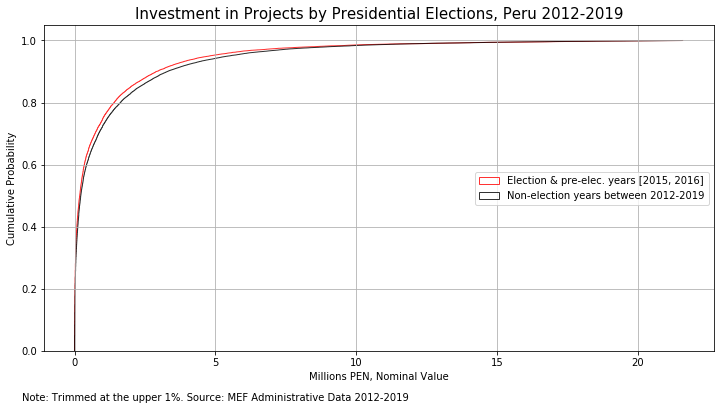

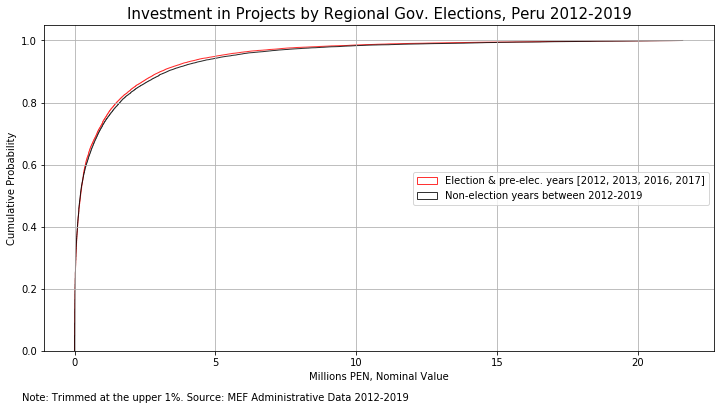

In [12]:
fn.cdf_elec_years(trimmed, 'ANO_EJE', all_years, variable, election_years_pres, title_pres, xlab, ylab, source)
fn.cdf_elec_years(trimmed, 'ANO_EJE', all_years, variable, election_years_reg, title_reg, xlab, ylab, source)
full = full.drop(columns='pim_proj_mll')

### 2.1 CDF for Target by electoral years 

In [13]:
variable = 'target'
all_years = [x for x in range(2012,2020)]
election_years_pres = [2015, 2016]
election_years_reg = [2012, 2013, 2016, 2017]
title_pres = 'Cumulative Execution of Projects by Presidential Elections, Peru 2012-2019'
title_reg = 'Cumulative Execution of Projects by Regional Gov. Elections, Peru 2012-2019'
xlab = 'Proportion of budget executed'
ylab = 'Cumulative Probability'
source = "Source: MEF Administrative Data {}-{}".format(all_years[0], all_years[-1])

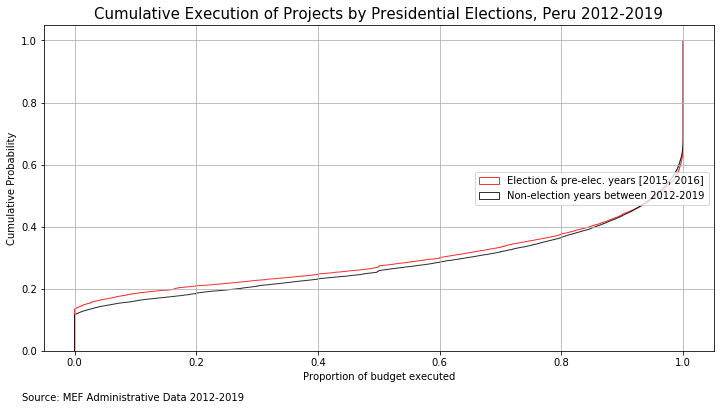

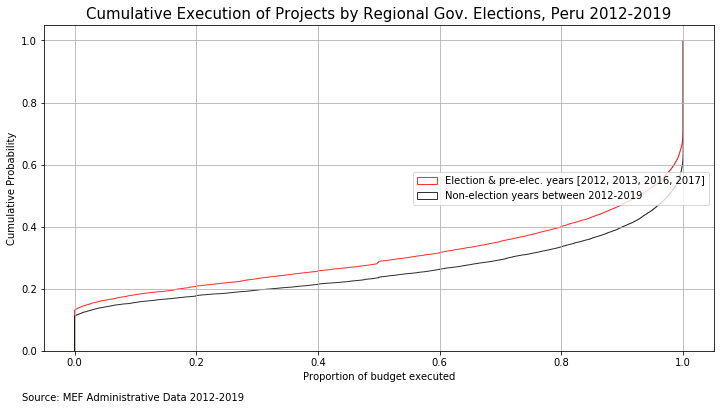

In [14]:
fn.cdf_elec_years(full, 'ANO_EJE', all_years, 'target', election_years_pres, title_pres, xlab, ylab, source)
fn.cdf_elec_years(full, 'ANO_EJE', all_years, 'target', election_years_reg, title_reg, xlab, ylab, source)

## 3. Preprocessing 

In [15]:
rows, cols = full.shape
desc = full.describe()
all_cols = list(full.columns)
no_impute = ['CODIGO_UNICO', 'ANO_EJE', 'mes', 'FECHA_REGISTRO', 'class',
             'FECHA_VIABLE_APROBADO', 'target', 'ok', 'year', 'month' ,'day' 
             'reg_count', 'tag_proy', 'SEC_EJEC', 'weight']

full.head()

,CODIGO_UNICO,ANO_EJE,mes,FECHA_REGISTRO,FECHA_VIABLE_APROBADO,SEC_EJEC,dev_acc_proj,exec,dev_acc_ue,exec_ue,pim_proj,dev_proj,elect_year,first_year,elect_presi_year,first_presi_year,nv_1,nv_2,nv_3,st_3,st_5,st_6,st_7,st_10,st_11,st_13,st_16,st_26,st_36,st_37,st_99,st_100,st_101,ft_1,ft_2,ft_3,ft_4,ft_5,pim_st_year_3,pim_st_year_5,pim_st_year_6,pim_st_year_7,pim_st_year_10,pim_st_year_11,pim_st_year_13,pim_st_year_16,pim_st_year_26,pim_st_year_36,pim_st_year_37,pim_st_year_99,pim_st_year_100,pim_st_year_101,pim_st_proj_3,pim_st_proj_5,pim_st_proj_6,pim_st_proj_7,pim_st_proj_10,pim_st_proj_11,pim_st_proj_13,pim_st_proj_16,pim_st_proj_26,pim_st_proj_36,pim_st_proj_37,pim_st_proj_99,pim_st_proj_100,pim_st_proj_101,pim_ft_proj_1,pim_ft_proj_2,pim_ft_proj_3,pim_ft_proj_4,pim_ft_proj_5,pim_nv_proj_1,pim_nv_proj_2,pim_nv_proj_3,pim_st_proj_pr_3,pim_st_proj_pr_5,pim_st_proj_pr_6,pim_st_proj_pr_7,pim_st_proj_pr_10,pim_st_proj_pr_11,pim_st_proj_pr_13,pim_st_proj_pr_16,pim_st_proj_pr_26,pim_st_proj_pr_36,pim_st_proj_pr_37,pim_st_proj_pr_99,pim_st_proj_pr_100,pim_st_proj_pr_101,pim_ft_proj_pr_1,pim_ft_proj_pr_2,pim_ft_proj_pr_3,pim_ft_proj_pr_4,pim_ft_proj_pr_5,pim_nv_proj_pr_1,pim_nv_proj_pr_2,pim_nv_proj_pr_3,dev_acc_st_3,dev_acc_st_5,dev_acc_st_6,dev_acc_st_7,dev_acc_st_10,dev_acc_st_11,dev_acc_st_13,dev_acc_st_16,dev_acc_st_26,dev_acc_st_36,dev_acc_st_37,dev_acc_st_99,dev_acc_st_100,dev_acc_st_101,exec_st_3,exec_st_5,exec_st_6,exec_st_7,exec_st_10,exec_st_11,exec_st_13,exec_st_16,exec_st_26,exec_st_36,exec_st_37,exec_st_99,exec_st_100,exec_st_101,dev_ft_month_sh_1,dev_ft_month_sh_2,dev_ft_month_sh_3,dev_ft_month_sh_4,dev_ft_month_sh_5,dev_st_month_sh_3,dev_st_month_sh_5,dev_st_month_sh_6,dev_st_month_sh_7,dev_st_month_sh_10,dev_st_month_sh_11,dev_st_month_sh_13,dev_st_month_sh_16,dev_st_month_sh_26,dev_st_month_sh_36,dev_st_month_sh_37,dev_st_month_sh_99,dev_st_month_sh_100,dev_st_month_sh_101,dev_nv_month_sh_1,dev_nv_month_sh_2,dev_nv_month_sh_3,target,ok,year,month,day,dev_proj_12m_last,dev_ft_month_sh_1_12m_last,dev_ft_month_sh_2_12m_last,dev_ft_month_sh_3_12m_last,dev_ft_month_sh_4_12m_last,dev_ft_month_sh_5_12m_last,dev_st_month_sh_3_12m_last,dev_st_month_sh_5_12m_last,dev_st_month_sh_6_12m_last,dev_st_month_sh_7_12m_last,dev_st_month_sh_10_12m_last,dev_st_month_sh_11_12m_last,dev_st_month_sh_13_12m_last,dev_st_month_sh_16_12m_last,dev_st_month_sh_26_12m_last,dev_st_month_sh_36_12m_last,dev_st_month_sh_37_12m_last,dev_st_month_sh_99_12m_last,dev_st_month_sh_100_12m_last,dev_st_month_sh_101_12m_last,dev_nv_month_sh_1_12m_last,dev_nv_month_sh_2_12m_last,dev_nv_month_sh_3_12m_last,dev_acc_st_3_3m_lag,dev_acc_st_3_6m_lag,dev_acc_st_3_12m_lag,dev_acc_st_5_3m_lag,dev_acc_st_5_6m_lag,dev_acc_st_5_12m_lag,dev_acc_st_6_3m_lag,dev_acc_st_6_6m_lag,dev_acc_st_6_12m_lag,dev_acc_st_7_3m_lag,dev_acc_st_7_6m_lag,dev_acc_st_7_12m_lag,dev_acc_st_10_3m_lag,dev_acc_st_10_6m_lag,dev_acc_st_10_12m_lag,dev_acc_st_11_3m_lag,dev_acc_st_11_6m_lag,dev_acc_st_11_12m_lag,dev_acc_st_13_3m_lag,dev_acc_st_13_6m_lag,dev_acc_st_13_12m_lag,dev_acc_st_16_3m_lag,dev_acc_st_16_6m_lag,dev_acc_st_16_12m_lag,dev_acc_st_26_3m_lag,dev_acc_st_26_6m_lag,dev_acc_st_26_12m_lag,dev_acc_st_36_3m_lag,dev_acc_st_36_6m_lag,dev_acc_st_36_12m_lag,dev_acc_st_37_3m_lag,dev_acc_st_37_6m_lag,dev_acc_st_37_12m_lag,dev_acc_st_99_3m_lag,dev_acc_st_99_6m_lag,dev_acc_st_99_12m_lag,dev_acc_st_100_3m_lag,dev_acc_st_100_6m_lag,dev_acc_st_100_12m_lag,dev_acc_st_101_3m_lag,dev_acc_st_101_6m_lag,dev_acc_st_101_12m_lag,dev_acc_proj_3m_mean,dev_acc_proj_6m_mean,dev_acc_proj_12m_mean,exec_3m_mean,exec_6m_mean,exec_12m_mean,dev_proj_3m_mean,dev_proj_6m_mean,dev_proj_12m_mean,dev_acc_st_3_3m_mean,dev_acc_st_3_6m_mean,dev_acc_st_3_12m_mean,dev_acc_st_5_3m_mean,dev_acc_st_5_6m_mean,dev_acc_st_5_12m_mean,dev_acc_st_6_3m_mean,dev_acc_st_6_6m_mean,dev_acc_st_6_12m_mean,dev_acc_st_7_3m_mean,dev_acc_st_7_6m_mean,dev_acc_st_7_12m_mean,dev_acc_st_10_3m_mean,dev_acc_st_10_6m_mean,dev_acc_st_10_12m_mean,dev_acc_s

### 3.0 A variable we missed

In [16]:
class_dummy = pd.get_dummies(full['class'])
full = pd.concat([full, class_dummy], axis=1)
del class_dummy

### 3.1 Missing imputations and creation of dummies

In [17]:
mv_dummy_impute = ['dev_proj_12m_last', 'dev_acc_st_3_3m_lag', 'dev_acc_st_3_6m_lag', 'dev_acc_st_3_12m_lag', 'agua_inadec']
mv_impute = [col for col in desc.columns if desc.loc['count', col] < rows and col not in mv_dummy_impute]
full = fn.mv_treat(full, mv_dummy_impute, 0, dummy=True)
full = fn.mv_treat(full, mv_impute, 0, dummy=False)

In [18]:
desc = full.describe()
desc

CODIGO_UNICO        ANO_EJE            mes       SEC_EJEC  \
count  6.343440e+05  634344.000000  634344.000000  634344.000000   
mean   2.184977e+06    2015.377965       6.500000   35928.373501   
std    7.198886e+04       1.697301       3.452055   97136.767855   
min    2.000846e+06    2013.000000       1.000000       0.000000   
25%    2.135720e+06    2014.000000       3.750000     799.000000   
50%    2.183504e+06    2015.000000       6.500000     956.000000   
75%    2.233850e+06    2017.000000       9.250000    1358.000000   
max    2.429343e+06    2018.000000      12.000000  500261.000000   

       dev_acc_proj           exec    dev_acc_ue        exec_ue      pim_proj  \
count  6.343440e+05  634344.000000  6.343440e+05  634344.000000  6.343440e+05   
mean   7.054788e+05       0.318644  6.223231e+07       0.312589  2.281498e+06   
std    7.602947e+06       2.823748  1.716786e+08       0.265933  1.696820e+07   
min   -1.594911e+06      -0.258915 -6.424552e+04      -0.045635  1.000000e+00   
25%    0.000000e+00       0.000000  2.840865e+06       0.080146  3.450000e+04   
50%    2.100000e+03       0.009609  1.974459e+07       0.257772  2.206610e+05   
75%    1.400000e+05       0.671699  7.069624e+07       0.495591  1.200000e+06   
max    1.149174e+09    1016.504918  3.316355e+09      10.661933  1.870601e+09   

           dev_proj     elect_year     first_year  elect_presi_year  \
count  6.343440e+05  634344.000000  634344.000000     634344.000000   
mean   7.698687e+05       0.316447       0.352162          0.163936   
std    8.205718e+06       0.465090       0.477645          0.370218   
min   -7.757216e+07       0.000000       0.000000          0.000000   
25%    0.000000e+00       0.000000       0.000000          0.000000   
50%    2.259490e+04       0.000000       0.000000          0.000000   
75%    2.920008e+05       1.000000       1.000000          0.000000   
max    1.430449e+09       1.000000       1.000000          1.000000   

       first_presi_year           nv_1           nv_2           nv_3  \
count     634344.000000  634344.000000  634344.000000  634344.000000   
mean           0.167455       0.418770       0.482199       0.116378   
std            0.373382       0.493358       0.499683       0.320679   
min            0.000000       0.000000       0.000000       0.000000   
25%            0.000000       0.000000       0.000000       0.000000   
50%            0.000000       0.000000       0.000000       0.000000   
75%            0.000000       1.000000       1.000000       0.000000   
max            1.000000       1.000000       1.000000       1.000000   

                st_3           st_5           st_6           st_7  \
count  634344.000000  634344.000000  634344.000000  634344.000000   
mean        0.008191       0.005335       0.005713       0.012126   
std         0.090134       0.072844       0.075368       0.109448   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

               st_10          st_11          st_13          st_16  \
count  634344.000000  634344.000000  634344.000000  634344.000000   
mean        0.090519       0.022322       0.069048       0.027789   
std         0.286924       0.147730       0.253535       0.164369   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

               st_26          st_36          st_37          st_99  \
count  634344.000000  634344.000000  634344.000000  634344.000

### 3.2 Outlier imputation with percentile 99

In [19]:
out_to_clean = [var for var in full.columns if var not in no_impute and var.startswith('mv_') == False and
                                                   (var.startswith('dev_acc_') == True or 
                                                    var == 'dev_proj')]
full = fn.outliers_imputation(full, 0.01, out_to_clean)

### 3.3 Removing constant variables

In [20]:
desc = full.describe()
discard = [col for col in desc.columns if np.isclose(desc.loc['std', col], 0) | np.isnan(desc.loc['std', col]) ]
discard

['day',
 'dev_acc_st_3_3m_mean',
 'dev_acc_st_3_6m_mean',
 'dev_acc_st_3_12m_mean',
 'dev_acc_st_5_3m_mean',
 'dev_acc_st_5_6m_mean',
 'dev_acc_st_5_12m_mean',
 'dev_acc_st_6_3m_mean',
 'dev_acc_st_6_6m_mean',
 'dev_acc_st_6_12m_mean',
 'dev_acc_st_7_12m_mean',
 'dev_acc_st_26_3m_mean',
 'dev_acc_st_26_6m_mean',
 'dev_acc_st_26_12m_mean',
 'reg_count',
 'p1139',
 'p1139_12m_delta',
 'p401g1',
 'p401g1_12m_delta',
 'p4199',
 'p4199_12m_delta']

### 3.3 Predictors and target variable

In [21]:
x_vars = [var for var in full.columns if var not in no_impute and var.startswith('mv_') == False and var not in discard ]

### 3.4 Correlation filter at 0.2

In [22]:
uncorr_vars_20 = fn.low_corr_vars(full[x_vars], full['target'].reset_index(), 0.20)

In [23]:
len(uncorr_vars_20)

100

### 3.6 Including dummy variables if var was imputted. Correlation filter at 0.8

In [24]:
mv_x_vars = [var for var in full.columns if var.startswith('mv_')]
uncorr_mv_vars_08 = fn.low_corr_vars(full[mv_x_vars], full['target'].reset_index(), 0.8)
uncorr_mv_vars_08

{'mv_agua_inadec',
 'mv_dev_acc_st_3_12m_lag',
 'mv_dev_acc_st_3_3m_lag',
 'mv_dev_acc_st_3_6m_lag'}

### 3.8 Final predictors

In [25]:
final_vars = list(uncorr_vars_20) + list(uncorr_mv_vars_08)
desc = full[final_vars].describe()
desc

,st_101_12m_lag,exec_st_99_12m_delta,p112a_12m_delta,mes_4,dev_ft_month_sh_5_12m_delta,exec_st_11_12m_delta,pim_st_proj_pr_11_12m_delta,exec_st_6_12m_delta,p_rama32_12m_delta,p1137_12m_delta,pim_nv_proj_2_12m_delta,ft_4_12m_lag,dev_st_month_sh_5_12m_mean,exec_12m_delta,pim_ft_proj_pr_3_12m_delta,mes_9,pim_st_proj_101_12m_delta,pim_st_year_99_12m_delta,mes_2,exec_st_7_12m_delta,exec_st_36_12m_delta,dev_proj_12m_delta,totmieho,pim_st_proj_pr_37_12m_delta,mes_11,p_rama47_12m_delta,mes_8,estad_civil_5_12m_delta,dev_acc_st_10_12m_delta,ocup_viv_6_12m_delta,dev_ft_month_sh_4_12m_delta,dominioA_13_12m_delta,st_13_12m_lag,MONTO_VIABLE_APROBADO,mes_10,exec_st_13_12m_delta,new,int,pim_st_proj_37,dev_acc_st_37_12m_delta,dev_st_month_sh_37_time_nz,pim_st_proj_3,pim_st_year_3_12m_delta,exec_st_5_12m_delta,techos_inadec_12m_delta,pim_st_proj_11_12m_delta,pim_nv_proj_3_12m_delta,und,pim_st_year_16_12m_delta,dev_nv_month_sh_1_12m_delta,mes_5,p_rama33_12m_delta,dev_acc_st_100_12m_delta,p4195,mes_7,ocu500_4_12m_delta,exec_st_16_12m_delta,st_7_12m_lag,pim_ft_proj_2,p_rama35_12m_delta,p1127_12m_delta,p4196_12m_delta,exec_6m_mean,pim_st_proj_10_12m_delta,dev_ft_month_sh_1_12m_mean,pim_st_proj_pr_26_12m_delta,pim_ft_proj_5_12m_delta,ocup_viv_4_12m_delta,pim_st_proj_pr_6_12m_delta,pim_ft_proj_1_12m_delta,mes_1,st_3_12m_lag,pim_st_year_10_12m_delta,dev_st_month_sh_11_12m_mean,exec_st_101_12m_delta,dev_st_month_sh_6_12m_mean,st_36_12m_lag,pim_ft_proj_4_12m_delta,pim_st_year_7_12m_delta,dev_ft_month_sh_1_12m_delta,ft_3_12m_lag,pim_st_proj_pr_13_12m_delta,elect_presi_year_12m_lag,pim_st_proj_pr_5_12m_delta,pim_ft_proj_pr_5_12m_delta,p4195_12m_delta,dev_st_month_sh_26_12m_delta,dev_st_month_sh_3_12m_delta,pim_st_proj_13_12m_delta,pim_st_proj_6_12m_delta,p4192_12m_delta,mes_3,pim_ft_proj_pr_2_12m_delta,pim_st_proj_5_12m_delta,mes_6,dev_ft_month_sh_3_12m_delta,ocup_viv_1_12m_delta,pim_st_proj_pr_7_12m_delta,pim_st_year_36_12m_delta,p_rama44_12m_delta,mv_dev_acc_st_3_6m_lag,mv_agua_inadec,mv_dev_acc_st_3_12m_lag,mv_dev_acc_st_3_3m_lag
count,634344.000000,634344.000000,634344.000000,634344.000000,634344.000000,634344.000000,634344.000000,634344.000000,634344.000000,634344.000000,6.343440e+05,634344.000000,634344.000000,634344.000000,634344.000000,634344.000000,6.343440e+05,6.343440e+05,634344.000000,634344.000000,634344.000000,6.343440e+05,634344.000000,634344.000000,634344.000000,634344.000000,634344.000000,634344.000000,6.343440e+05,634344.000000,634344.000000,634344.000000,634344.000000,6.343440e+05,634344.000000,634344.000000,634344.000000,634344.000000,6.343440e+05,6.343440e+05,634344.000000,6.343440e+05,6.343440e+05,634344.000000,634344.000000,6.343440e+05,6.343440e+05,634344.000000,6.343440e+05,634344.000000,634344.000000,634344.000000,6.343440e+05,634344.000000,634344.000000,634344.000000,634344.000000,634344.000000,6.343440e+05,634344.000000,634344.000000,634344.000000,634344.000000,6.343440e+05,634344.000000,634344.000000,6.343440e+05,634344.000000,634344.000000,6.343440e+05,634344.000000,634344.000000,6.343440e+05,634344.000000,634344.000000,634344.000000,634344.000000,6.343440e+05,6.343440e+05,6.343440e+05,634344.000000,634344.000000,634344.000000,634344.000000,634344.000000,634344.000000,634344.000000,634344.000000,6.343440e+05,6.343440e+05,634344.000000,634344.000000,634344.000000,6.343440e+05,634344.000000,634344.000000,634344.000000,634344.000000,6.343440e+05,634344.000000,634344.000000,634344.000000,634344.000000,634344.000000
mean,0.021766,-0.001954,0.006808,0.083333,-0.000290,-0.000478,0.000346,0.000074,0.000087,0.004332,1.095530e+04,0.067550,0.004086,-0.064244,-0.038280,0.083333,1.228570e+02,-1.918142e+08,0.083333,-0.000211,-0.000095,-2.303892e+04,3.777644,0.000454,0.083333,0.000472,0.083333,-0.002450,-4.090049e+06,-0.000744,0.002015,-0.000764,0.048343,1.381849e+07,0.083333,-0.001800,0.305380,0.034278,7.534055e+04,-7.200885e+06,8.201674,1.698228e+04,-5.139756e+04,-0.000218,-0.006203,1.521989e+03,2.297559e+03,0.007245,3.011228e+05,-0.00643

### 3.8 Polynomials

In [26]:
log_vars = [col for col in out_to_clean if col in final_vars and col.endswith('_delta') == False or col == 'MONTO_VIABLE_APROBADO' ]
log_vars = [col for col in log_vars if desc.loc['min', col] >= 0]
square_vars = [col for col in final_vars if any([col.startswith(s) for s in ['mv_', 'ft_', 'st_', 'mes_']]) == False]

for var in log_vars:
    full[var] = np.log(full[var] +1)
    
for var in square_vars:
    full[var + '_sq'] = full[var]**2  

In [27]:
reg_vars = final_vars + [var + '_sq' for var in square_vars]

## 4. Machine Learning Analysis

In [28]:
import numpy as np
from scipy.stats import uniform as sp_rand

from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, train_test_split

### 4.1 Splitting and checking complete dataset

In [29]:

oot = full.loc[full.ANO_EJE == 2018, reg_vars + ['target']]
X_train, X_test, y_train, y_test = train_test_split(full.loc[full.ANO_EJE < 2018, reg_vars], 
                                                    full.loc[full.ANO_EJE < 2018, 'target'], 
                                                    test_size= 0.2)
y_train, y_test = y_train.reset_index(), y_test.reset_index()

### 4.2 Correlation of predictor vars 

Text(0.5, 1, 'Correlation of Selected Variables')

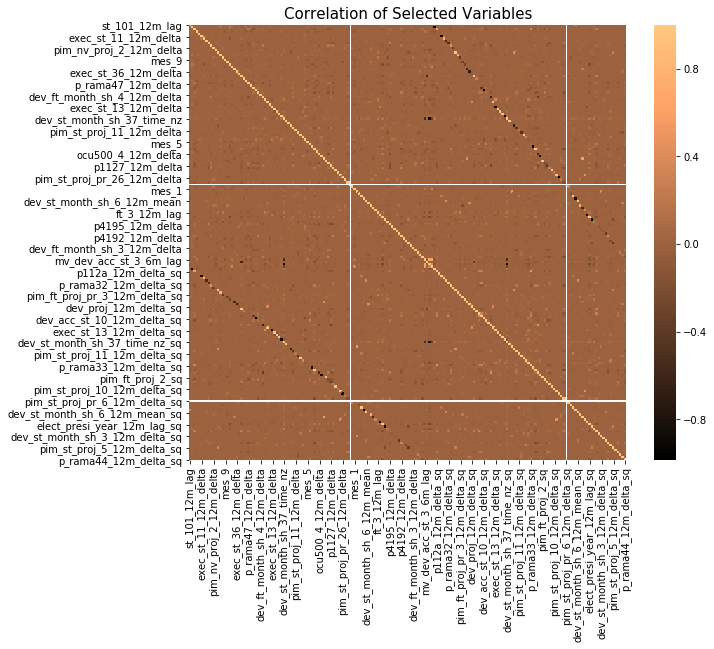

In [30]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = X_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap='copper',
            square=True, ax=ax)
plt.title('Correlation of Selected Variables', fontdict={'fontsize': 15, 'fontweight': 3})

### 4.3 Machine Learning Algorithms: LASSO, GridSearchCV and Best Model

In [ ]:
from sklearn import linear_model

# Lasso 
lasso = linear_model.Lasso()

# Parameters 
alphas = np.arange(0.01, 1.01, 0.1).tolist()
params = {'alpha': alphas}

# K-Fold Cross Validation
k = 5

grid_search_cv = GridSearchCV(estimator=lasso, 
                          param_grid=params, 
                          cv=k,
                          scoring= 'r2',
                          return_train_score=True,
                          n_jobs = 5, 
                          verbose = 10)

grid_model_result = grid_search_cv.fit(X_train, y_train['target']) 

In [ ]:
# CV Results
cv_results = pd.DataFrame(grid_model_result.cv_results_)
cv_results = cv_results[['params', 'mean_test_score', 'mean_train_score', 'rank_test_score']] 
cv_results

In [ ]:
# Best Model
cv_results.sort_values(by=['rank_test_score'], ascending=True).head(1)

In [ ]:
# Best Model
best_lasso = grid_model_result.best_estimator_
print("BEST MODEL IN TRAIN:", best_lasso)
print(grid_model_result.best_params_)
print(grid_model_result.best_score_)

In [ ]:

y_hat_test =  best_lasso.predict(X_test)
y_hat_train =  best_lasso.predict(X_train)
y_hat_oot =  best_lasso.predict(oot[reg_vars])
# Assign 1 to values >1 and 0 to values < 0 
y_hat_test[y_hat_test > 1] = 1
y_hat_test[y_hat_test < 0] = 0

y_hat_train[y_hat_train > 1] = 1
y_hat_train[y_hat_train < 0] = 0

y_hat_oot[y_hat_oot > 1] = 1
y_hat_oot[y_hat_oot< 0] = 0

In [ ]:
# R2 
print('Train: ', r2_score(y_train['target'], y_hat_train))
print('Test: ', r2_score(y_test['target'], y_hat_test))
print('OOT: ', r2_score(oot['target'], y_hat_oot))

In [ ]:
# Scatter 
fig, ax = plt.subplots(figsize=(12, 6))
plt.scatter(y_hat_test, y_test['target'],  color='gray', alpha=0.2)
plt.xlim(0, 1)
plt.ylim(0, 1)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x, color='r', alpha = 0.5)
ax.set_xlabel('Predicted Target')
ax.set_ylabel('True Target')
plt.title('Predicted vs True Execution \n Test Sample', fontdict={'fontsize': 15, 'fontweight': 3})
plt.show()

In [ ]:
# Scatter 
fig, ax = plt.subplots(figsize=(12, 6))
plt.scatter(y_hat_oot, oot['target'],  color='gray', alpha=0.2)
plt.xlim(0, 1)
plt.ylim(0, 1)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x, color='r', alpha = 0.5)
ax.set_xlabel('Predicted Target')
ax.set_ylabel('True Target')
plt.title('Predicted vs True Execution \n OOT Sample', fontdict={'fontsize': 15, 'fontweight': 3})
plt.show()

In [ ]:
#CDF Graph 
import matplotlib as mpl
fig, ax = plt.subplots(figsize=(12, 6))

n, bins, patches = ax.hist(y_test['target'], 5000, density=1, 
                            histtype='step', alpha=0.8, color='r',
                            cumulative=True, label='True target var')
# Overlay non eleciton years .
ax.hist(y_hat_test, 5000, density=1, 
        histtype='step', cumulative=True, alpha=0.8, color='k', 
        label='Predicted Target var')

axpolygons = [poly for poly in ax.get_children() if isinstance(poly, mpl.patches.Polygon)]
for poly in axpolygons:
    poly.set_xy(poly.get_xy()[:-1])
ax.grid(True)
ax.legend(loc='right')
ax.set_xlabel('Ratio of Execution')
ax.set_ylabel('Cumulative Distribution Function')
plt.title('True vs Predicted Cumulative Distributions \n Test Sample', fontdict={'fontsize': 15, 'fontweight': 3})
plt.show()

In [ ]:
#CDF Graph 
import matplotlib as mpl
fig, ax = plt.subplots(figsize=(12, 6))

n, bins, patches = ax.hist(oot['target'], 5000, density=1, 
                            histtype='step', alpha=0.8, color='r',
                            cumulative=True, label='True target var')
# Overlay non eleciton years .
ax.hist(y_hat_oot, 5000, density=1, 
        histtype='step', cumulative=True, alpha=0.8, color='k', 
        label='Predicted Target var')

axpolygons = [poly for poly in ax.get_children() if isinstance(poly, mpl.patches.Polygon)]
for poly in axpolygons:
    poly.set_xy(poly.get_xy()[:-1])
ax.grid(True)
ax.legend(loc='right')
ax.set_xlabel('Ratio of Execution')
ax.set_ylabel('Cumulative Distribution Function')
plt.title('True vs Predicted Cumulative Distributions \n OOT Sample', fontdict={'fontsize': 15, 'fontweight': 3})
plt.show()

### 4.4 Machine Learning Algorithms: Random Forest, GridSearchCV and Best Model

In [31]:
X_oot = full.loc[full.ANO_EJE == 2018, final_vars]
y_oot = full.loc[full.ANO_EJE == 2018, 'target'].reset_index()
X_train, X_test, y_train, y_test = train_test_split(full.loc[full.ANO_EJE < 2018, final_vars], 
                                                    full.loc[full.ANO_EJE < 2018, 'target'], 
                                                    test_size= 0.2)
y_train, y_test, y_oot = y_train.reset_index(), y_test.reset_index(), y_oot.reset_index()

In [32]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regression
rf = RandomForestRegressor(random_state=0, n_jobs=5)

# Parameters 
params = {
    'n_estimators': [100, 50],
    'min_samples_split': [400, 200],
    'min_samples_leaf': [50]}

# K-Fold Cross Validation
k = 5

fgrid_search_cv = GridSearchCV(estimator=rf, 
                          param_grid=params, 
                          cv=k,
                          scoring= 'r2',
                          return_train_score=True,
                          n_jobs = 5, 
                          verbose = 10)

fgrid_model_result = fgrid_search_cv.fit(X_train, y_train['target']) 

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed: 11.7min
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed: 17.7min
[Parallel(n_jobs=5)]: Done  14 out of  20 | elapsed: 30.2min remaining: 12.9min
[Parallel(n_jobs=5)]: Done  17 out of  20 | elapsed: 36.3min remaining:  6.4min
[Parallel(n_jobs=5)]: Done  20 out of  20 | elapsed: 36.3min remaining:    0.0s
[Parallel(n_jobs=5)]: Done  20 out of  20 | elapsed: 36.3min finished


In [33]:
# Results 
fcv_results = pd.DataFrame(fgrid_model_result.cv_results_)
fcv_results = fcv_results[['params', 'mean_test_score', 'mean_train_score', 'rank_test_score']] 
fcv_results.sort_values(by=['rank_test_score'], ascending=True).head(1)

,params,mean_test_score,mean_train_score,rank_test_score
2,"{'min_samples_leaf': 50, 'min_samples_split': ...",0.47597,0.507073,1


In [34]:
# Best Model
best_rf = fgrid_model_result.best_estimator_
print("BEST MODEL IN TRAIN:", best_rf)
print(fgrid_model_result.best_params_)
print(fgrid_model_result.best_score_)

BEST MODEL IN TRAIN: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=50,
                      min_samples_split=200, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=5, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)
{'min_samples_leaf': 50, 'min_samples_split': 200, 'n_estimators': 100}
0.47596977594950796


In [35]:
# R2 
y_hat_test = best_rf.predict(X_test)
y_hat_train =   best_rf.predict(X_train)
y_hat_oot =   best_rf.predict(X_oot)
print('Train: ', r2_score(y_train['target'], y_hat_train))
print('Test: ', r2_score(y_test['target'], y_hat_test))
print('OOT: ', r2_score(y_oot['target'], y_hat_oot))

Train:  0.5239987887161573
Test:  0.49604048524249367
OOT:  0.2987509695812711


In [37]:
# Assign 1 to values >1 and 0 to values < 0 
y_hat_test[y_hat_test > 1] = 1
y_hat_test[y_hat_test < 0] = 0
y_hat_train[y_hat_train > 1] = 1
y_hat_train[y_hat_train < 0] = 0
y_hat_oot[y_hat_oot > 1] = 1
y_hat_oot[y_hat_oot < 0] = 0

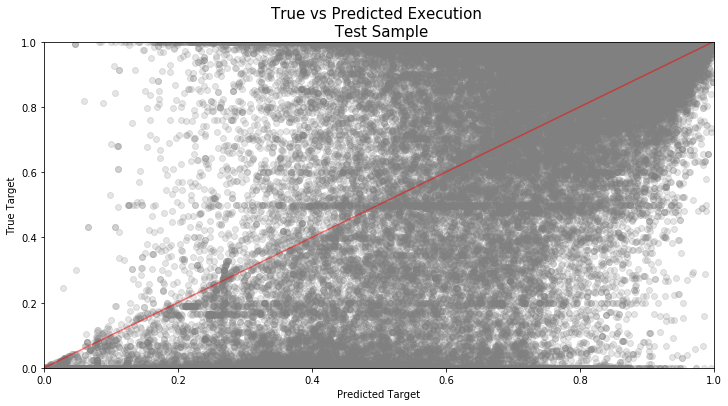

In [39]:
# Scatter 
fig, ax = plt.subplots(figsize=(12, 6))
plt.scatter(y_hat_test, y_test['target'],  color='gray', alpha=0.2)
plt.xlim(0, 1)
plt.ylim(0, 1)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x, color='r', alpha = 0.5)
ax.set_xlabel('Predicted Target')
ax.set_ylabel('True Target')
plt.title('True vs Predicted Execution \n Test Sample', fontdict={'fontsize': 15, 'fontweight': 3})
plt.show()

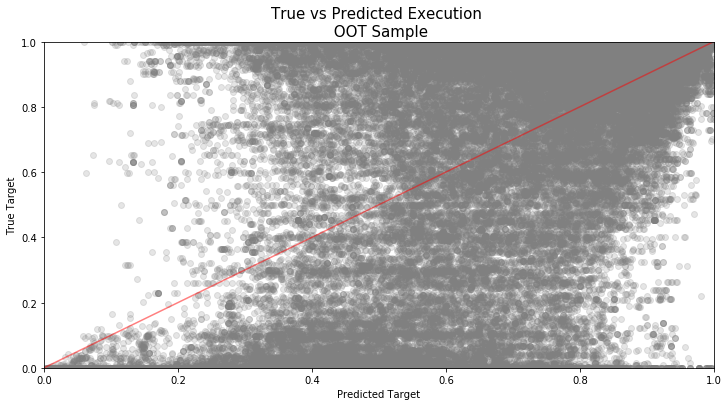

In [40]:
# Scatter 
fig, ax = plt.subplots(figsize=(12, 6))
plt.scatter(y_hat_oot, y_oot['target'],  color='gray', alpha=0.2)
plt.xlim(0, 1)
plt.ylim(0, 1)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x, color='r', alpha = 0.5)
ax.set_xlabel('Predicted Target')
ax.set_ylabel('True Target')
plt.title('True vs Predicted Execution \n OOT Sample', fontdict={'fontsize': 15, 'fontweight': 3})
plt.show()

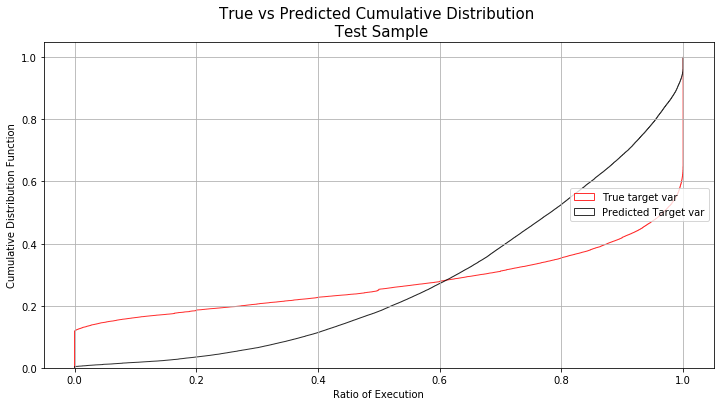

In [42]:
#CDF Graph 
import matplotlib as mpl
fig, ax = plt.subplots(figsize=(12, 6))

n, bins, patches = ax.hist(y_test['target'], 5000, density=1, 
                            histtype='step', alpha=0.8, color='r',
                            cumulative=True, label='True target var')
# Overlay non eleciton years .
ax.hist(y_hat_test, 5000, density=1, 
        histtype='step', cumulative=True, alpha=0.8, color='k', 
        label='Predicted Target var')

axpolygons = [poly for poly in ax.get_children() if isinstance(poly, mpl.patches.Polygon)]
for poly in axpolygons:
    poly.set_xy(poly.get_xy()[:-1])
ax.grid(True)
ax.legend(loc='right')
ax.set_xlabel('Ratio of Execution')
ax.set_ylabel('Cumulative Distribution Function')
plt.title('True vs Predicted Cumulative Distribution \n Test Sample', fontdict={'fontsize': 15, 'fontweight': 3})
plt.show()

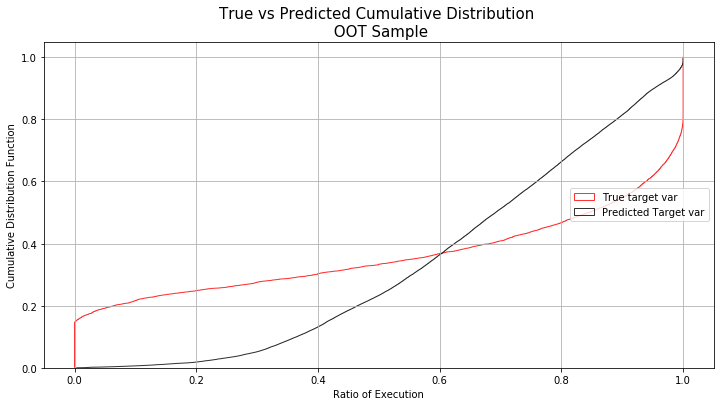

In [43]:
#CDF Graph 
import matplotlib as mpl
fig, ax = plt.subplots(figsize=(12, 6))

n, bins, patches = ax.hist(y_oot['target'], 5000, density=1, 
                            histtype='step', alpha=0.8, color='r',
                            cumulative=True, label='True target var')
# Overlay non eleciton years .
ax.hist(y_hat_oot, 5000, density=1, 
        histtype='step', cumulative=True, alpha=0.8, color='k', 
        label='Predicted Target var')

axpolygons = [poly for poly in ax.get_children() if isinstance(poly, mpl.patches.Polygon)]
for poly in axpolygons:
    poly.set_xy(poly.get_xy()[:-1])
ax.grid(True)
ax.legend(loc='right')
ax.set_xlabel('Ratio of Execution')
ax.set_ylabel('Cumulative Distribution Function')
plt.title('True vs Predicted Cumulative Distribution \n OOT Sample', fontdict={'fontsize': 15, 'fontweight': 3})
plt.show()

### 4.5 Model Fit and Feature Importance

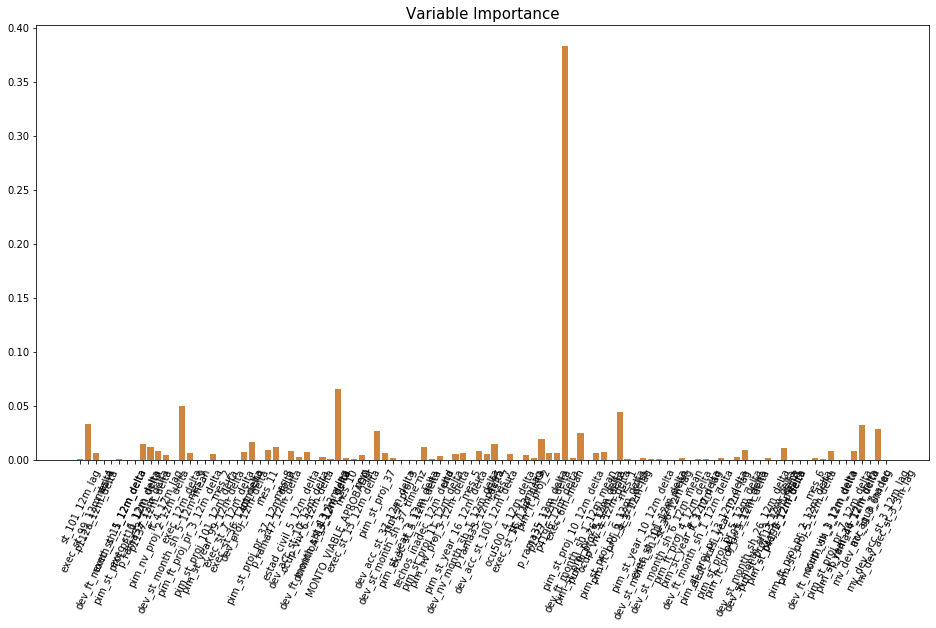

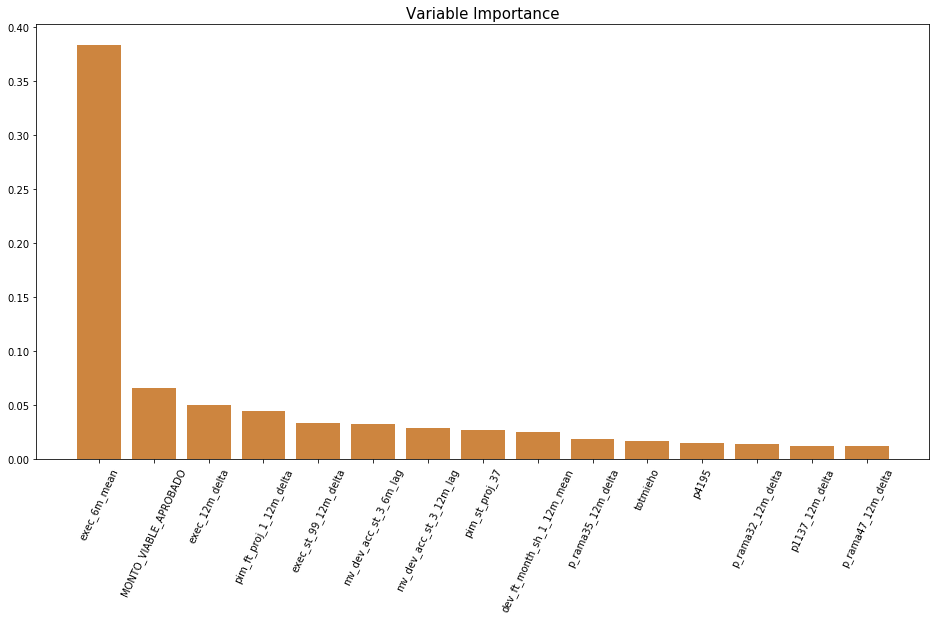

In [62]:
wiji = {'vars': final_vars, 'importance': best_rf.feature_importances_}
wuju = pd.DataFrame.from_dict(wiji)
wuju.sort_values('importance', ascending = False).head(10)
wuju = wuju.sort_values('importance', ascending = False).head(15)

f, ax = plt.subplots(figsize=(16, 8))
plt.bar(range(15), wuju['importance'], color='peru')
plt.xticks(range(15), wuju['vars'], rotation=65)
plt.title('Variable Importance', fontdict={'fontsize': 15, 'fontweight': 3})
plt.show()

In [61]:
wuju.shape

(104, 2)